In [1]:
import pandas as pd                                             
import numpy as np    
import os
import random
import string
random.seed(123)
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
marketing_dt = pd.read_csv("customer_1_marketing_data.csv")

In [3]:
sales_dt = pd.read_csv("customer_1_sales_data.csv")

## Exploratory data Analysis & Data Preprocessing

In [4]:
#reading the first 5 records of marketing data
marketing_dt.head()

,Date,Spend,AMS_revenue,Impressions,Clicks,PID,CID
0,01-01-2018,143.78,648.86,165668,336,p1,c1
1,08-01-2018,34.24,242.03,37688,81,p1,c1
2,15-01-2018,282.10,1588.98,228193,601,p1,c1
3,22-01-2018,202.67,1982.98,151943,510,p1,c1
4,29-01-2018,60.63,659.56,35479,153,p1,c1


In [5]:
#reading the first 5 records of sales data
sales_dt.head()

,Date,Units,Revenue,Inventory_Amount,Inventory_Units,Price,PID,CID
0,01-01-2018,44,969.35,NaN,NaN,22.030682,p1,c1
1,08-01-2018,43,1049.66,9459.0,NaN,24.410698,p1,c1
2,15-01-2018,54,1357.19,9523.0,NaN,25.133148,p1,c1
3,22-01-2018,139,2865.77,9483.0,NaN,20.617050,p1,c1
4,29-01-2018,104,1993.40,9371.0,NaN,19.167308,p1,c1


In [6]:
#summary statistics of marketing data
marketing_dt.describe()

,Spend,AMS_revenue,Impressions,Clicks
count,19554.000000,19554.000000,1.955400e+04,19554.000000
mean,39.949732,447.008335,2.686509e+04,122.182213
std,148.747042,1786.862396,1.305175e+05,329.419608
min,0.000000,0.000000,0.000000e+00,0.000000
25%,1.090000,0.000000,9.200000e+02,6.000000
50%,10.075000,117.185000,7.407500e+03,38.000000
75%,34.607500,384.382500,2.374225e+04,116.000000
max,8175.370000,93388.850000,1.260116e+07,10693.000000


In [7]:
#summary statistics of sales data
sales_dt.describe()

,Units,Revenue,Inventory_Amount,Inventory_Units,Price
count,19554.000000,19554.000000,18928.000000,0.0,19162.000000
mean,73.413061,1458.564922,624.314825,NaN,22.527655
std,263.676119,6690.355192,1771.978058,NaN,14.190802
min,0.000000,0.000000,0.000000,NaN,0.000000
25%,7.000000,137.747500,54.000000,NaN,14.990252
50%,21.000000,405.660000,153.000000,NaN,19.750749
75%,57.000000,1100.105000,418.000000,NaN,25.335793
max,10573.000000,417879.990000,26020.000000,NaN,202.080000


In [8]:
#information about the attributes like total frequency number of each attribute along with the data type 
marketing_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19554 entries, 0 to 19553
Data columns (total 7 columns):
Date           19554 non-null object
Spend          19554 non-null float64
AMS_revenue    19554 non-null float64
Impressions    19554 non-null int64
Clicks         19554 non-null int64
PID            19554 non-null object
CID            19554 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 1.0+ MB


In [9]:
#information about the attributes like total frequency number of each attribute along with the data type 
sales_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19554 entries, 0 to 19553
Data columns (total 8 columns):
Date                19554 non-null object
Units               19554 non-null int64
Revenue             19554 non-null float64
Inventory_Amount    18928 non-null float64
Inventory_Units     0 non-null float64
Price               19162 non-null float64
PID                 19554 non-null object
CID                 19554 non-null object
dtypes: float64(4), int64(1), object(3)
memory usage: 1.2+ MB


In [10]:
#dimentions of the data
marketing_dt.shape

(19554, 7)

In [11]:
#dimentions of the data
sales_dt.shape

(19554, 8)

In [12]:
#checking for the type of data
marketing_dt.dtypes

Date            object
Spend          float64
AMS_revenue    float64
Impressions      int64
Clicks           int64
PID             object
CID             object
dtype: object

In [13]:
#checking for the type of data
sales_dt.dtypes

Date                 object
Units                 int64
Revenue             float64
Inventory_Amount    float64
Inventory_Units     float64
Price               float64
PID                  object
CID                  object
dtype: object

In [14]:
#merging of twwo dataframes
ms_dt = pd.merge(marketing_dt, sales_dt,  how='left', left_on=['PID','CID','Date'], right_on = ['PID','CID','Date'])


In [15]:
#backing up the marketing and sales demographics
ms_dt.to_pickle("data.csv")

In [16]:
#dimentions of the new dataframe
ms_dt.shape

(19554, 12)

In [17]:
ms_dt.head()

,Date,Spend,AMS_revenue,Impressions,Clicks,PID,CID,Units,Revenue,Inventory_Amount,Inventory_Units,Price
0,01-01-2018,143.78,648.86,165668,336,p1,c1,44,969.35,NaN,NaN,22.030682
1,08-01-2018,34.24,242.03,37688,81,p1,c1,43,1049.66,9459.0,NaN,24.410698
2,15-01-2018,282.10,1588.98,228193,601,p1,c1,54,1357.19,9523.0,NaN,25.133148
3,22-01-2018,202.67,1982.98,151943,510,p1,c1,139,2865.77,9483.0,NaN,20.617050
4,29-01-2018,60.63,659.56,35479,153,p1,c1,104,1993.40,9371.0,NaN,19.167308


In [18]:
ms_dt.tail()

,Date,Spend,AMS_revenue,Impressions,Clicks,PID,CID,Units,Revenue,Inventory_Amount,Inventory_Units,Price
19549,27-05-2019,6.49,18.39,6905,20,p313,c9,6,110.34,22.0,NaN,18.39
19550,27-05-2019,2.57,51.50,2657,10,p314,c10,7,180.25,37.0,NaN,25.75
19551,27-05-2019,0.62,56.67,610,2,p316,c9,10,199.90,53.0,NaN,19.99
19552,27-05-2019,0.00,0.00,3,0,p317,c4,5,750.40,27.0,NaN,150.08
19553,27-05-2019,19.57,151.09,12922,46,p318,c4,46,871.70,537.0,NaN,18.95


In [19]:
#checking for distribution of data in each columns and their respective counts.
for i in ms_dt.columns.values:
    print (i)
    print (pd.value_counts(ms_dt[i].values,))
    print (len(ms_dt[i].unique()))
    print ("****************************************")

Date
06-08-2018    282
09-04-2018    282
30-04-2018    281
07-05-2018    281
29-01-2018    279
             ... 
22-04-2019    246
06-05-2019    245
27-05-2019    245
29-04-2019    245
01-01-2019    244
Length: 74, dtype: int64
74
****************************************
Spend
0.00     3296
0.15       48
0.02       34
0.38       25
0.45       23
         ... 
11.36       1
32.89       1
98.71       1
82.32       1
88.67       1
Length: 7117, dtype: int64
7117
****************************************
AMS_revenue
0.00      5132
19.99       69
24.99       28
14.99       26
9.99        25
          ... 
183.07       1
563.76       1
345.90       1
141.06       1
314.21       1
Length: 12286, dtype: int64
12286
****************************************
Impressions
0        2648
1          33
2          22
3          17
4          16
         ... 
362         1
4456        1
21845       1
20832       1
40          1
Length: 13037, dtype: int64
13037
****************************************
Cl

In [20]:
#extraction of year, month and date
ms_dt['date'] = pd.to_datetime(ms_dt['Date'])
ms_dt['duration_year'], ms_dt['duration_month'], ms_dt['Duration_day'] = ms_dt['date'].dt.year, ms_dt['date'].dt.month, ms_dt['date'].dt.day
ms_dt

,Date,Spend,AMS_revenue,Impressions,Clicks,PID,CID,Units,Revenue,Inventory_Amount,Inventory_Units,Price,date,duration_year,duration_month,Duration_day
0,01-01-2018,143.78,648.86,165668,336,p1,c1,44,969.35,NaN,NaN,22.030682,2018-01-01,2018,1,1
1,08-01-2018,34.24,242.03,37688,81,p1,c1,43,1049.66,9459.0,NaN,24.410698,2018-08-01,2018,8,1
2,15-01-2018,282.10,1588.98,228193,601,p1,c1,54,1357.19,9523.0,NaN,25.133148,2018-01-15,2018,1,15
3,22-01-2018,202.67,1982.98,151943,510,p1,c1,139,2865.77,9483.0,NaN,20.617050,2018-01-22,2018,1,22
4,29-01-2018,60.63,659.56,35479,153,p1,c1,104,1993.40,9371.0,NaN,19.167308,2018-01-29,2018,1,29
5,05-02-2018,0.00,0.00,0,0,p1,c1,35,870.85,9241.0,NaN,24.881429,2018-05-02,2018,5,2
6,12-02-2018,0.00,0.00,0,0,p1,c1,27,662.25,9225.0,NaN,24.527778,2018-12-02,2018,12,2
7,19-02-2018,0.00,0.00,0,0,p1,c1,33,836.21,9199.0,NaN,25.339697,2018-02-19,2018,2,19
8,26-02-2018,0.00,0.00,0,0,p1,c1,37,936.26,9170.0,NaN,25.304324,2018-02-26,2018,2,26
9,05-03-2018,0.00,0.00,0,0,p1,c1,38,953.63,9130.0,NaN,25.095526,2018-05-03,2018,5,3


## Dates

In [21]:
#distribution of years
ms_dt.duration_year.value_counts()

2018    14019
2019     5535
Name: duration_year, dtype: int64

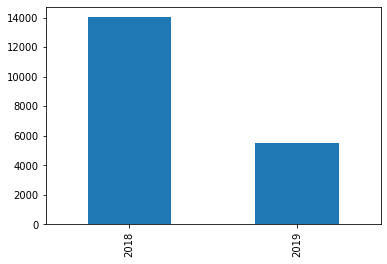

In [22]:
#distribution of cumilative sales data available for the year 2018-19
ms_dt.duration_year.value_counts().plot(kind='bar')

In [23]:
#distribution of the months 
ms_dt.duration_month.value_counts()

1     2621
5     2348
4     2344
8     1597
2     1596
3     1586
7     1359
12    1320
11    1318
10    1308
6     1080
9     1077
Name: duration_month, dtype: int64

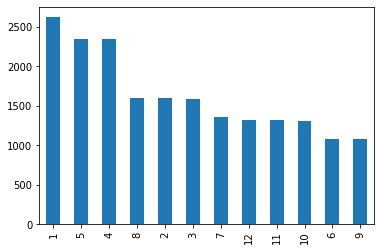

In [24]:
#cumilative distribution of sales monthly
ms_dt.duration_month.value_counts().plot(kind='bar')

In [25]:
#distribution of the sales on dates
ms_dt.Duration_day.value_counts()

3     1059
4     1056
1     1046
2     1046
19     816
26     816
29     788
18     788
25     785
22     785
15     780
30     555
6      548
23     546
16     546
7      538
11     529
13     528
5      526
14     525
20     524
10     523
28     521
9      520
21     520
12     520
17     520
24     515
27     503
8      282
Name: Duration_day, dtype: int64

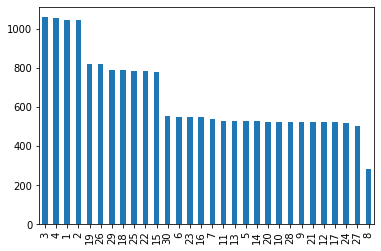

In [26]:
##cumilative distribution of sales on days
ms_dt.Duration_day.value_counts().plot(kind='bar')

In [27]:
#column names
ms_dt.columns

Index(['Date', 'Spend', 'AMS_revenue', 'Impressions', 'Clicks', 'PID', 'CID',
       'Units', 'Revenue', 'Inventory_Amount', 'Inventory_Units', 'Price',
       'date', 'duration_year', 'duration_month', 'Duration_day'],
      dtype='object')

## Spend 

In [28]:
#display spend distinct values
ms_dt["Spend"].value_counts()

0.00     3296
0.15       48
0.02       34
0.38       25
0.45       23
         ... 
11.36       1
32.89       1
98.71       1
82.32       1
88.67       1
Name: Spend, Length: 7117, dtype: int64

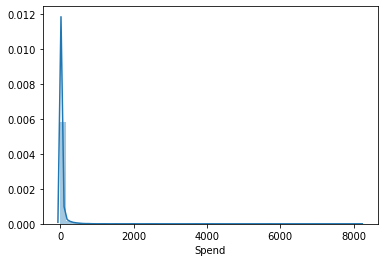

In [29]:
sns.distplot(ms_dt['Spend'])

In [30]:
#contengency table between Spend and duration_month
pd.crosstab(ms_dt.Spend, ms_dt.duration_month)

duration_month,1,2,3,4,5,6,7,8,9,10,11,12
Spend,,,,,,,,,,,,
0.00,247,623,250,210,659,143,187,158,119,62,82,556
0.02,2,6,3,5,5,2,2,3,4,2,0,0
0.03,2,2,1,3,1,2,1,1,0,1,0,0
0.04,0,0,0,3,1,1,2,1,0,0,1,0
0.05,1,1,0,1,0,0,1,0,1,0,1,1
0.06,2,0,1,0,0,2,1,1,0,1,1,0
0.07,3,0,3,4,0,0,1,0,3,0,0,1
0.08,2,0,1,1,1,0,1,0,0,1,1,0
0.09,4,2,3,2,1,0,2,3,1,1,0,0


In [31]:
#contengency table between Spend and duration_day
pd.crosstab(ms_dt.Spend, ms_dt.Duration_day)

Duration_day,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
Spend,,,,,,,,,,,,,,,,,,,,,
0.00,97,534,526,134,62,78,77,48,24,22,...,45,58,79,30,57,329,25,46,85,84
0.02,0,0,0,5,2,0,3,0,2,3,...,3,0,2,0,2,1,1,0,0,2
0.03,1,0,1,1,1,0,1,1,1,1,...,0,2,0,0,1,0,1,0,0,1
0.04,1,0,1,0,0,2,0,0,0,0,...,1,0,2,0,0,0,0,0,0,0
0.05,0,1,0,1,1,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
0.06,0,0,0,0,0,0,0,1,0,0,...,0,1,1,0,0,1,0,0,0,0
0.07,2,0,0,2,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,1,3
0.08,0,0,0,0,1,1,0,0,0,0,...,0,1,0,0,0,1,0,1,2,0
0.09,5,0,0,2,1,1,0,0,1,1,...,2,0,0,0,0,2,0,0,1,0


In [32]:
ms_dt.columns

Index(['Date', 'Spend', 'AMS_revenue', 'Impressions', 'Clicks', 'PID', 'CID',
       'Units', 'Revenue', 'Inventory_Amount', 'Inventory_Units', 'Price',
       'date', 'duration_year', 'duration_month', 'Duration_day'],
      dtype='object')

In [33]:
ms_dt2 = ms_dt[[ 'AMS_revenue',  'Clicks', 'CID', 'Revenue','Spend']]
ms_dt2.head()

,AMS_revenue,Clicks,CID,Revenue,Spend
0,648.86,336,c1,969.35,143.78
1,242.03,81,c1,1049.66,34.24
2,1588.98,601,c1,1357.19,282.10
3,1982.98,510,c1,2865.77,202.67
4,659.56,153,c1,1993.40,60.63


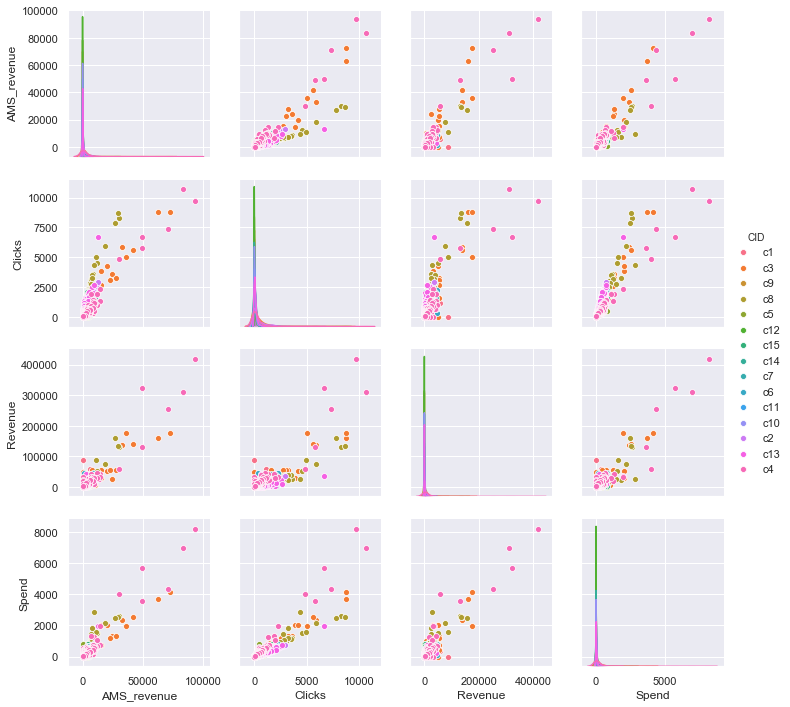

In [35]:
sns.pairplot(ms_dt2, hue='CID',height=2.5)

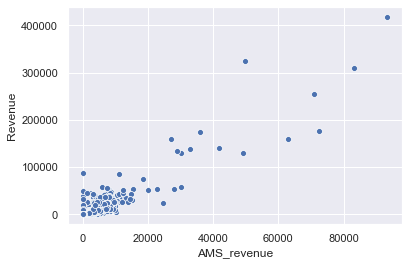

In [34]:
import seaborn as sns
sns.set()
sns.scatterplot(x="AMS_revenue", y="Revenue", data=ms_dt)

In [38]:
ms_dt=ms_dt.drop(labels=['Inventory_Units'], axis=1)

In [39]:
ms_dt["AMS_revenue"].value_counts()

0.00      5132
19.99       69
24.99       28
14.99       26
9.99        25
          ... 
183.07       1
563.76       1
345.90       1
141.06       1
314.21       1
Name: AMS_revenue, Length: 12286, dtype: int64

In [36]:
ms_dt["AMS_revenue"].corr(ms_dt['Clicks'])


0.8826444497251448

In [37]:
ms_dt["AMS_revenue"].corr(ms_dt['Impressions'])


0.5852985325077864

In [38]:
ms_dt["Units"].corr(ms_dt['Revenue'])


0.8540448829894247

In [33]:
pd.crosstab(ms_dt.AMS_revenue, ms_dt.Revenue)

Revenue,0.00,5.31,5.99,6.48,6.56,6.59,6.62,6.63,6.85,7.09,...,137297.06,139740.50,158489.36,160058.01,175164.76,176197.05,253628.60,309531.07,323353.75,417879.99
AMS_revenue,,,,,,,,,,,,,,,,,,,,,
0.00,238,1,1,5,3,1,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0
3.69,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4.99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.83,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.89,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6.19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6.48,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
ms_dt.PID.nunique()

318

In [35]:
ms_dt.CID.nunique()

15

In [36]:
ms_dt.Price.max()

202.08

In [37]:
ms_dt.Units.nunique()

824

In [39]:
ms_dt=ms_dt.drop(labels=['Date'], axis=1)

In [40]:
ms_dt=ms_dt.drop(labels=['date'], axis=1)

In [51]:
ms_dt.columns

Index(['Spend', 'AMS_revenue', 'Impressions', 'Clicks', 'PID', 'CID', 'Units',
       'Revenue', 'Inventory_Amount', 'Price', 'duration_year',
       'duration_month', 'Duration_day'],
      dtype='object')

In [52]:
ms_dt.Spend.nunique()

7117

In [48]:
ms_dt["Price"].fillna(ms_dt["Price"].mean(skipna=True),inplace=True)

In [49]:
ms_dt["Inventory_Amount"].fillna(ms_dt["Inventory_Amount"].mean(skipna=True),inplace=True)

In [50]:
ms_dt=ms_dt.drop(labels=['Inventory_Units'], axis=1)

In [57]:
spend_ms_dt = ms_dt.loc[(ms_dt['Spend']>=25) & (ms_dt['AMS_revenue']>=100),:].loc[:,['Clicks','PID','CID','Units','Revenue','Inventory_Amount']]

spend_ms_dt

,Clicks,PID,CID,Units,Revenue,Inventory_Amount
0,336,p1,c1,44,969.35,624.314825
1,81,p1,c1,43,1049.66,9459.000000
2,601,p1,c1,54,1357.19,9523.000000
3,510,p1,c1,139,2865.77,9483.000000
4,153,p1,c1,104,1993.40,9371.000000
24,64,p1,c1,79,1940.92,8456.000000
28,161,p1,c1,165,4087.63,8119.000000
36,106,p1,c1,273,6661.20,9181.000000
37,138,p1,c1,436,9679.48,9253.000000
39,85,p1,c1,99,2568.06,10931.000000


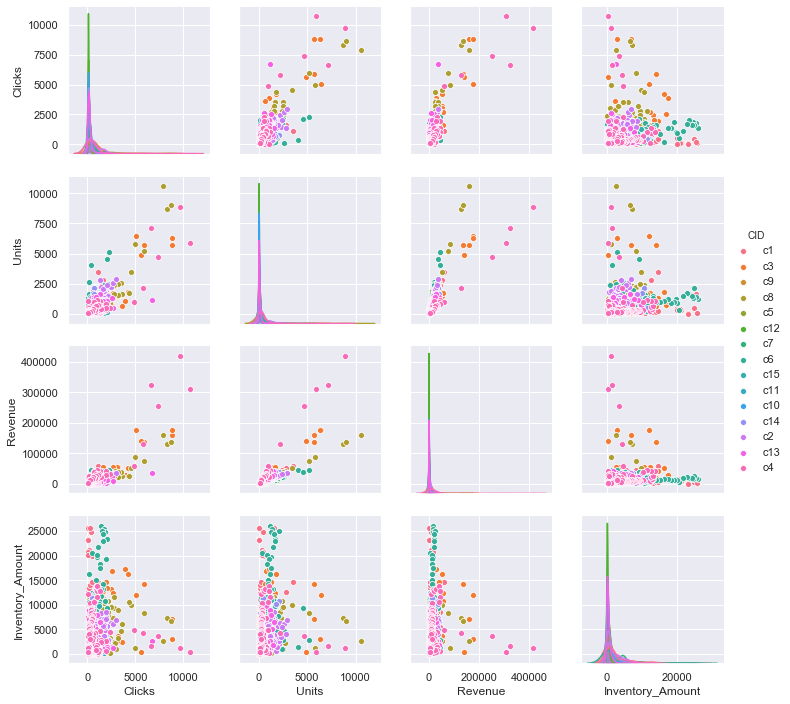

In [58]:
sns.pairplot(spend_ms_dt, hue='CID',height=2.5)

In [54]:
ms_dt.isna().sum()

Spend               0
AMS_revenue         0
Impressions         0
Clicks              0
PID                 0
CID                 0
Units               0
Revenue             0
Inventory_Amount    0
Price               0
duration_year       0
duration_month      0
Duration_day        0
dtype: int64

In [59]:
AMS_ms_dt = ms_dt.loc[(ms_dt['AMS_revenue']>=100),:].loc[:,['Clicks','PID','CID','Units','Revenue','Price']]

AMS_ms_dt

,Clicks,PID,CID,Units,Revenue,Price
0,336,p1,c1,44,969.35,22.030682
1,81,p1,c1,43,1049.66,24.410698
2,601,p1,c1,54,1357.19,25.133148
3,510,p1,c1,139,2865.77,20.617050
4,153,p1,c1,104,1993.40,19.167308
23,29,p1,c1,77,1891.06,24.559221
24,64,p1,c1,79,1940.92,24.568608
25,50,p1,c1,73,1790.86,24.532329
27,73,p1,c1,98,2405.99,24.550918
28,161,p1,c1,165,4087.63,24.773515


## Marketting spend  impact on price, units and clicks

In [62]:
spend_ms_dt1 = ms_dt.loc[(ms_dt['Spend']>=8),:].loc[:,['Price','Clicks','Units']]

spend_ms_dt1

,Price,Clicks,Units
0,22.030682,336,44
1,24.410698,81,43
2,25.133148,601,54
3,20.617050,510,139
4,19.167308,153,104
17,24.784048,16,42
18,24.753684,14,57
23,24.559221,29,77
24,24.568608,64,79
25,24.532329,50,73


In [63]:
spend_ms_dt2 = ms_dt.loc[(ms_dt['Spend']<=8),:].loc[:,['Price','Clicks','Units']]

spend_ms_dt2

,Price,Clicks,Units
5,24.881429,0,35
6,24.527778,0,27
7,25.339697,0,33
8,25.304324,0,37
9,25.095526,0,38
10,24.722051,0,39
11,24.888788,0,33
12,25.721250,1,16
13,25.230588,2,17
14,24.958000,2,20


In [64]:
pd.crosstab(ms_dt.Spend, ms_dt.Clicks)

Clicks,0,1,2,3,4,5,6,7,8,9,...,6654,6690,7346,7853,8284,8672,8783,8806,9688,10693
Spend,,,,,,,,,,,,,,,,,,,,,
0.00,3296,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.02,0,34,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.03,0,14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.04,0,5,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.05,0,6,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.06,0,6,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.07,0,14,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.08,0,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.09,0,15,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:

ms_dt["newspend"]=pd.cut(bins=[0,8,100],x=ms_dt["Spend"],labels=["marketting_spend_bellow8","marketting_spend_above8"],include_lowest=True)

In [66]:
pd.crosstab(ms_dt.newspend, ms_dt.Clicks)

Clicks,0,1,2,3,4,5,6,7,8,9,...,451,452,454,455,464,467,497,507,560,563
newspend,,,,,,,,,,,,,,,,,,,,,
marketting_spend_bellow8,3296,413,324,325,274,249,259,258,214,236,...,0,0,0,0,0,0,0,0,0,0
marketting_spend_above8,0,0,0,0,0,0,0,0,0,1,...,1,1,1,2,1,1,1,1,1,1


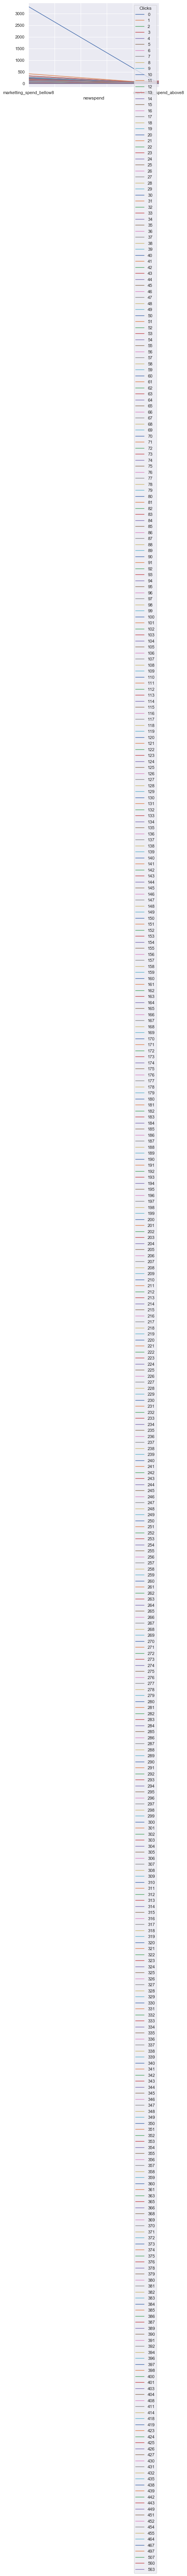

In [68]:
pd.crosstab(ms_dt.newspend, ms_dt.Clicks).plot()

In [69]:
pd.crosstab(ms_dt.newspend, ms_dt.Units)

Units,0,1,2,3,4,5,6,7,8,9,...,1356,1368,1461,1474,1604,1612,1619,1720,2605,2721
newspend,,,,,,,,,,,,,,,,,,,,,
marketting_spend_bellow8,319,850,663,602,509,440,399,345,307,240,...,0,1,1,1,0,0,0,1,0,1
marketting_spend_above8,40,83,147,148,171,195,207,212,188,161,...,1,0,0,0,1,1,1,0,1,0


In [70]:
ms_dt["newspend"].value_counts()

marketting_spend_bellow8    8996
marketting_spend_above8     8990
Name: newspend, dtype: int64

In [71]:
pd.crosstab(ms_dt.newspend, ms_dt.CID)

CID,c1,c10,c11,c12,c13,c14,c15,c2,c3,c4,c5,c6,c7,c8,c9
newspend,,,,,,,,,,,,,,,
marketting_spend_bellow8,631,472,296,1035,922,736,790,190,145,210,1056,278,115,424,1696
marketting_spend_above8,713,598,474,855,1751,633,671,127,77,115,966,326,176,284,1224


## AMS revenue impacton clicks and pricing

In [72]:
AMS_ms_dt1 = ms_dt.loc[(ms_dt['AMS_revenue']>=110),:].loc[:,['Price','Clicks','Units']]

AMS_ms_dt1

,Price,Clicks,Units
0,22.030682,336,44
1,24.410698,81,43
2,25.133148,601,54
3,20.617050,510,139
4,19.167308,153,104
24,24.568608,64,79
25,24.532329,50,73
27,24.550918,73,98
28,24.773515,161,165
30,24.486515,60,132


In [73]:
AMS_ms_dt2 = ms_dt.loc[(ms_dt['AMS_revenue']<=110),:].loc[:,['Price','Clicks','Units']]

AMS_ms_dt2

,Price,Clicks,Units
5,24.881429,0,35
6,24.527778,0,27
7,25.339697,0,33
8,25.304324,0,37
9,25.095526,0,38
10,24.722051,0,39
11,24.888788,0,33
12,25.721250,1,16
13,25.230588,2,17
14,24.958000,2,20


In [74]:
pd.crosstab(ms_dt.AMS_revenue, ms_dt.Clicks)

Clicks,0,1,2,3,4,5,6,7,8,9,...,6654,6690,7346,7853,8284,8672,8783,8806,9688,10693
AMS_revenue,,,,,,,,,,,,,,,,,,,,,
0.00,3271,353,237,183,143,119,92,101,74,72,...,0,0,0,0,0,0,0,0,0,0
3.69,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4.99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.83,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.89,0,0,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5.99,0,1,2,2,0,1,3,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6.19,0,1,2,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6.48,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:

ms_dt["newAMS_revenue"]=pd.cut(bins=[0,110,1000],x=ms_dt["Spend"],labels=["marketting_ams_bellow110","marketting_ams_above110"],include_lowest=True)

In [104]:
pd.crosstab(ms_dt.newAMS_revenue, ms_dt.Clicks)

Clicks,0,1,2,3,4,5,6,7,8,9,...,2523,2628,2684,2691,2704,2715,2759,2872,2939,3035
newAMS_revenue,,,,,,,,,,,,,,,,,,,,,
marketting_ams_bellow110,3296,413,324,325,274,249,259,258,214,237,...,0,0,0,0,0,0,0,0,0,0
marketting_ams_above110,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [105]:
pd.crosstab(ms_dt.newAMS_revenue, ms_dt.Units)

Units,0,1,2,3,4,5,6,7,8,9,...,2605,2671,2721,2763,2802,2863,3499,4019,4537,5152
newAMS_revenue,,,,,,,,,,,,,,,,,,,,,
marketting_ams_bellow110,359,933,810,750,680,636,606,557,495,401,...,1,0,1,0,0,0,0,0,0,0
marketting_ams_above110,8,0,1,1,0,1,1,2,0,2,...,0,1,0,1,1,1,1,1,1,1


In [106]:
ms_dt["newAMS_revenue"].value_counts()

marketting_ams_bellow110    18146
marketting_ams_above110      1373
Name: newAMS_revenue, dtype: int64

In [107]:
pd.crosstab(ms_dt.newAMS_revenue, ms_dt.CID)

CID,c1,c10,c11,c12,c13,c14,c15,c2,c3,c4,c5,c6,c7,c8,c9
newAMS_revenue,,,,,,,,,,,,,,,
marketting_ams_bellow110,1354,1073,782,1897,2697,1377,1479,326,230,331,2035,610,301,712,2942
marketting_ams_above110,51,50,53,16,192,32,181,145,169,101,57,72,41,55,158


## Impressions impact on clicks and pricing

In [75]:
impressions_ms_dt = ms_dt.loc[(ms_dt['Impressions']>=6500),:].loc[:,['Price','Clicks','Units']]

impressions_ms_dt

,Price,Clicks,Units
0,22.030682,336,44
1,24.410698,81,43
2,25.133148,601,54
3,20.617050,510,139
4,19.167308,153,104
24,24.568608,64,79
25,24.532329,50,73
27,24.550918,73,98
28,24.773515,161,165
29,24.464595,68,111


In [76]:
impressions_ms_dt1 = ms_dt.loc[(ms_dt['Impressions']<=6500),:].loc[:,['Price','Clicks','Units']]

impressions_ms_dt1

,Price,Clicks,Units
5,24.881429,0,35
6,24.527778,0,27
7,25.339697,0,33
8,25.304324,0,37
9,25.095526,0,38
10,24.722051,0,39
11,24.888788,0,33
12,25.721250,1,16
13,25.230588,2,17
14,24.958000,2,20


In [77]:
pd.crosstab(ms_dt.Impressions, ms_dt.Clicks)

Clicks,0,1,2,3,4,5,6,7,8,9,...,6654,6690,7346,7853,8284,8672,8783,8806,9688,10693
Impressions,,,,,,,,,,,,,,,,,,,,,
0,2648,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,10,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,11,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:

ms_dt["newImpressions"]=pd.cut(bins=[0,6500,60000],x=ms_dt["Impressions"],labels=["ad_display_bellow6500","ad_display_above6500"],include_lowest=True)

In [80]:
pd.crosstab(ms_dt.newImpressions, ms_dt.Clicks)

Clicks,0,1,2,3,4,5,6,7,8,9,...,547,592,604,631,641,655,656,657,734,927
newImpressions,,,,,,,,,,,,,,,,,,,,,
ad_display_bellow6500,3285,412,324,324,271,248,254,254,212,227,...,0,0,0,0,0,0,0,0,0,0
ad_display_above6500,11,1,0,1,3,1,5,4,2,10,...,1,1,1,1,1,1,1,1,1,1


In [81]:
ms_dt["newImpressions"].value_counts()

ad_display_bellow6500    9310
ad_display_above6500     8350
Name: newImpressions, dtype: int64

In [82]:
pd.crosstab(ms_dt.newImpressions, ms_dt.CID)

CID,c1,c10,c11,c12,c13,c14,c15,c2,c3,c4,c5,c6,c7,c8,c9
newImpressions,,,,,,,,,,,,,,,
ad_display_bellow6500,599,474,338,1061,1062,758,859,161,140,212,1145,295,84,452,1670
ad_display_above6500,697,549,400,801,1555,541,615,154,96,140,875,323,181,253,1170


In [83]:
pd.crosstab(ms_dt.newImpressions, ms_dt.Units)

Units,0,1,2,3,4,5,6,7,8,9,...,1341,1348,1368,1461,1474,1612,1619,1720,2605,2721
newImpressions,,,,,,,,,,,,,,,,,,,,,
ad_display_bellow6500,312,853,680,612,519,468,410,362,312,244,...,0,1,1,1,1,0,0,1,0,0
ad_display_above6500,52,79,129,139,160,168,195,195,182,158,...,1,0,0,0,0,1,1,0,1,1


## Revenue impact on clicks, units and pricing

In [84]:
revenue_ms_dt = ms_dt.loc[(ms_dt['Revenue']>=670),:].loc[:,['Price','Clicks','Units']]

revenue_ms_dt

,Price,Clicks,Units
0,22.030682,336,44
1,24.410698,81,43
2,25.133148,601,54
3,20.617050,510,139
4,19.167308,153,104
5,24.881429,0,35
7,25.339697,0,33
8,25.304324,0,37
9,25.095526,0,38
10,24.722051,0,39


In [85]:
revenue_ms_dt1 = ms_dt.loc[(ms_dt['Revenue']<=670),:].loc[:,['Price','Clicks','Units']]

revenue_ms_dt1

,Price,Clicks,Units
6,24.527778,0,27
12,25.721250,1,16
13,25.230588,2,17
14,24.958000,2,20
15,24.909048,11,21
16,24.745385,3,26
52,42.740000,39,2
53,44.990000,32,2
54,44.990000,45,7
55,38.970000,48,3


In [87]:
pd.crosstab(ms_dt.Revenue, ms_dt.Clicks)

Clicks,0,1,2,3,4,5,6,7,8,9,...,6654,6690,7346,7853,8284,8672,8783,8806,9688,10693
Revenue,,,,,,,,,,,,,,,,,,,,,
0.00,135,33,24,15,13,14,10,10,9,1,...,0,0,0,0,0,0,0,0,0,0
5.31,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.99,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6.48,3,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6.56,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6.59,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6.62,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6.63,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6.85,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:

ms_dt["newRevenue"]=pd.cut(bins=[0,670,2600],x=ms_dt["Revenue"],labels=["sales revenue_bellow670","ad_display_above670"],include_lowest=True)

In [89]:
pd.crosstab(ms_dt.newRevenue, ms_dt.Clicks)

Clicks,0,1,2,3,4,5,6,7,8,9,...,1176,1190,1195,1204,1215,1241,1461,1553,1705,1745
newRevenue,,,,,,,,,,,,,,,,,,,,,
sales revenue_bellow670,2679,392,308,304,259,236,233,242,203,215,...,0,0,0,0,0,0,0,0,0,0
ad_display_above670,451,17,12,19,13,9,25,16,11,20,...,1,1,1,1,1,1,1,1,1,1


In [90]:
ms_dt["newRevenue"].value_counts()

sales revenue_bellow670    12407
ad_display_above670         4988
Name: newRevenue, dtype: int64

In [91]:
pd.crosstab(ms_dt.newRevenue, ms_dt.CID)

CID,c1,c10,c11,c12,c13,c14,c15,c2,c3,c4,c5,c6,c7,c8,c9
newRevenue,,,,,,,,,,,,,,,
sales revenue_bellow670,901,664,488,1447,1821,994,1091,187,162,117,1411,311,111,582,2120
ad_display_above670,312,394,299,392,832,287,341,96,32,131,532,289,168,137,746


In [92]:
pd.crosstab(ms_dt.newRevenue, ms_dt.Units)

Units,0,1,2,3,4,5,6,7,8,9,...,415,418,419,420,422,423,424,437,440,457
newRevenue,,,,,,,,,,,,,,,,,,,,,
sales revenue_bellow670,367,933,811,751,680,634,603,554,489,398,...,0,0,0,0,0,0,0,0,0,0
ad_display_above670,0,0,0,0,0,3,4,5,6,5,...,1,1,1,1,2,1,1,1,1,1


## Inventory Amount impact

In [93]:
ia_ms_dt = ms_dt.loc[(ms_dt['Inventory_Amount']>=310),:].loc[:,['Price','Clicks','Units']]

ia_ms_dt

,Price,Clicks,Units
0,22.030682,336,44
1,24.410698,81,43
2,25.133148,601,54
3,20.617050,510,139
4,19.167308,153,104
5,24.881429,0,35
6,24.527778,0,27
7,25.339697,0,33
8,25.304324,0,37
9,25.095526,0,38


In [94]:
ia_ms_dt1 = ms_dt.loc[(ms_dt['Inventory_Amount']<=310),:].loc[:,['Price','Clicks','Units']]

ia_ms_dt1

,Price,Clicks,Units
53,44.990000,32,2
54,44.990000,45,7
55,38.970000,48,3
56,34.146000,19,5
57,35.075000,0,2
58,39.650000,0,3
59,39.650000,0,5
60,39.650000,0,1
61,39.650000,0,4
62,39.650000,0,6


In [95]:

ms_dt["newInventoryAmount"]=pd.cut(bins=[0,310,1000],x=ms_dt["Inventory_Amount"],labels=["inventoryamount_above310","inventoryamount_bellow310"],include_lowest=True)

In [96]:
pd.crosstab(ms_dt.newInventoryAmount, ms_dt.Clicks)

Clicks,0,1,2,3,4,5,6,7,8,9,...,1917,1931,1971,1990,2073,2302,2380,3035,5605,10693
newInventoryAmount,,,,,,,,,,,,,,,,,,,,,
inventoryamount_above310,2580,377,288,292,242,214,210,223,176,203,...,0,0,0,0,0,0,1,0,0,0
inventoryamount_bellow310,473,24,29,30,30,26,43,30,34,26,...,1,1,1,1,1,1,0,1,1,1


In [97]:
ms_dt["newInventoryAmount"].value_counts()

inventoryamount_above310     12973
inventoryamount_bellow310     4261
Name: newInventoryAmount, dtype: int64

In [98]:
pd.crosstab(ms_dt.newInventoryAmount, ms_dt.CID)

CID,c1,c10,c11,c12,c13,c14,c15,c2,c3,c4,c5,c6,c7,c8,c9
newInventoryAmount,,,,,,,,,,,,,,,
inventoryamount_above310,914,741,473,1460,1877,958,1222,247,155,230,1525,436,147,538,2050
inventoryamount_bellow310,202,270,282,404,800,232,276,82,122,92,402,154,99,172,672


In [99]:
pd.crosstab(ms_dt.newInventoryAmount, ms_dt.Units)

Units,0,1,2,3,4,5,6,7,8,9,...,1013,1045,1255,1362,1720,1790,2350,2457,4842,5894
newInventoryAmount,,,,,,,,,,,,,,,,,,,,,
inventoryamount_above310,302,881,754,709,641,604,583,516,457,378,...,0,1,1,0,0,0,0,0,0,0
inventoryamount_bellow310,62,43,48,39,33,28,23,38,35,23,...,1,0,0,1,1,1,1,1,1,1


## Marketting spend Impact on Sales revenue

In [100]:
pd.crosstab(ms_dt.newspend,ms_dt.newRevenue)

newRevenue,sales revenue_bellow670,ad_display_above670
newspend,,
marketting_spend_bellow8,7612,1153
marketting_spend_above8,4705,3483


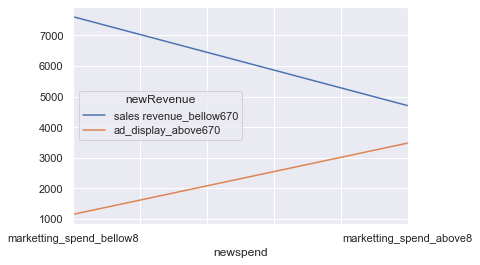

In [101]:
pd.crosstab(ms_dt.newspend,ms_dt.newRevenue).plot()

## AMS revenue impact on sales revenue

In [108]:
pd.crosstab(ms_dt.newAMS_revenue,ms_dt.newRevenue)

newRevenue,sales revenue_bellow670,ad_display_above670
newAMS_revenue,,
marketting_ams_bellow110,12338,4712
marketting_ams_above110,69,276


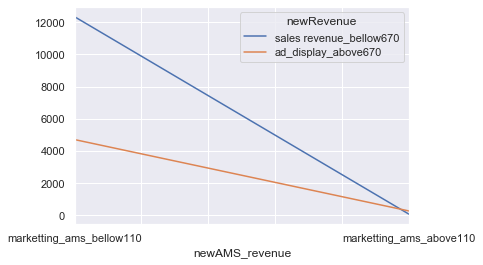

In [109]:
pd.crosstab(ms_dt.newAMS_revenue,ms_dt.newRevenue).plot()

## Impressions impact on sales revenue

In [110]:
pd.crosstab(ms_dt.newImpressions,ms_dt.newRevenue)

newRevenue,sales revenue_bellow670,ad_display_above670
newImpressions,,
ad_display_bellow6500,7897,1180
ad_display_above6500,4371,3249


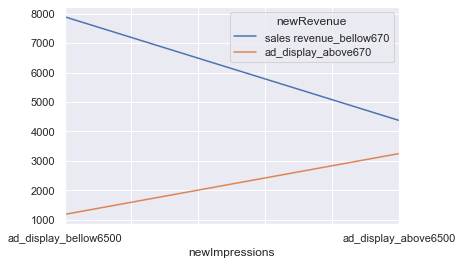

In [111]:
pd.crosstab(ms_dt.newImpressions,ms_dt.newRevenue).plot()

## Inventory Amount impact on sales revenue

In [112]:
pd.crosstab(ms_dt.newInventoryAmount,ms_dt.newRevenue)

newRevenue,sales revenue_bellow670,ad_display_above670
newInventoryAmount,,
inventoryamount_above310,10577,2160
inventoryamount_bellow310,1619,2011


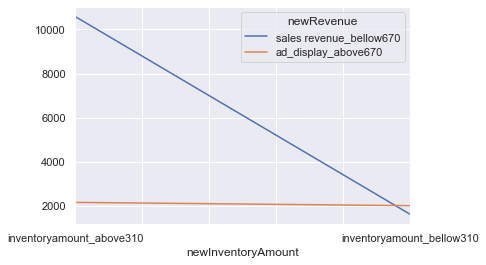

In [113]:
pd.crosstab(ms_dt.newInventoryAmount,ms_dt.newRevenue).plot()

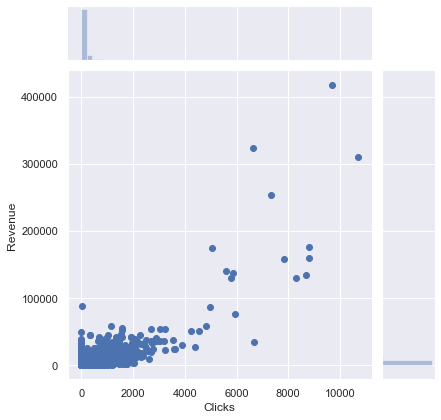

In [114]:
sns.jointplot(x="Clicks", y="Revenue", data=ms_dt)

[Text(0, 0, 'c1'),
 Text(0, 0, 'c3'),
 Text(0, 0, 'c9'),
 Text(0, 0, 'c8'),
 Text(0, 0, 'c5'),
 Text(0, 0, 'c12'),
 Text(0, 0, 'c15'),
 Text(0, 0, 'c14'),
 Text(0, 0, 'c7'),
 Text(0, 0, 'c6'),
 Text(0, 0, 'c11'),
 Text(0, 0, 'c10'),
 Text(0, 0, 'c2'),
 Text(0, 0, 'c13'),
 Text(0, 0, 'c4')]

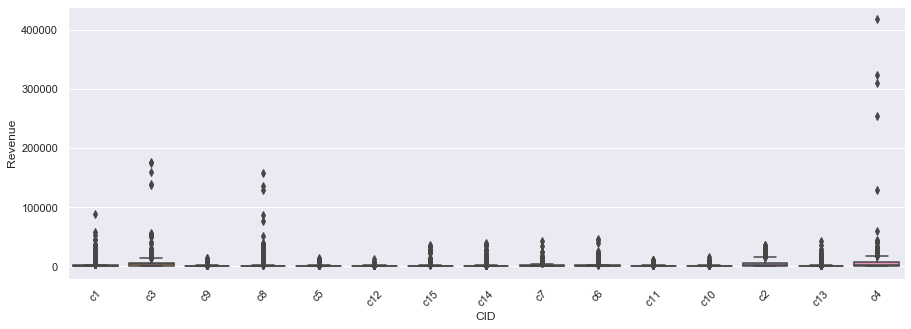

In [122]:
sns.set(rc={'figure.figsize':(15,5)})
ax=sns.boxplot(x='CID', y='Revenue', data=ms_dt)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

[Text(0, 0, 'c1'),
 Text(0, 0, 'c3'),
 Text(0, 0, 'c9'),
 Text(0, 0, 'c8'),
 Text(0, 0, 'c5'),
 Text(0, 0, 'c12'),
 Text(0, 0, 'c15'),
 Text(0, 0, 'c14'),
 Text(0, 0, 'c7'),
 Text(0, 0, 'c6'),
 Text(0, 0, 'c11'),
 Text(0, 0, 'c10'),
 Text(0, 0, 'c2'),
 Text(0, 0, 'c13'),
 Text(0, 0, 'c4')]

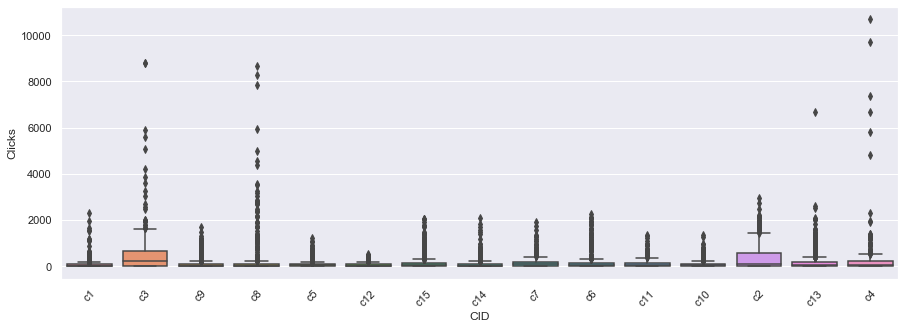

In [123]:
sns.set(rc={'figure.figsize':(15,5)})
ax=sns.boxplot(x='CID', y='Clicks', data=ms_dt)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

In [125]:
ms_dt.columns

Index(['Spend', 'AMS_revenue', 'Impressions', 'Clicks', 'PID', 'CID', 'Units',
       'Revenue', 'Inventory_Amount', 'Price', 'duration_year',
       'duration_month', 'Duration_day', 'newspend', 'newImpressions',
       'newRevenue', 'newInventoryAmount', 'newAMS_revenue'],
      dtype='object')

In [127]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.model_selection import cross_validate

In [128]:
# marketting_dt = pd.read_csv("customer_1_marketing_data.csv")

# sales_dt = pd.read_csv("customer_1_sales_data.csv")

In [129]:
# new_df_1 = pd.merge(marketting_dt, sales_dt,  how='left', left_on=['PID','CID','Date'], right_on = ['PID','CID','Date'])


In [130]:
# #extraction of year, month and date
# new_df_1['date'] = pd.to_datetime(new_df_1['Date'])
# new_df_1['duration_year'], new_df_1['duration_month'], new_df_1['Duration_day'] = new_df_1['date'].dt.year, new_df_1['date'].dt.month, new_df_1['date'].dt.day
# new_df_1

In [131]:
# new_df_1.drop('Date', axis=1, inplace=True)
# new_df_1.drop('Inventory_Units', axis=1, inplace=True)


In [132]:
# new_df_1["Inventory_Amount"].fillna(0,inplace=True)

In [134]:
ms_dt.dtypes

Spend                  float64
AMS_revenue            float64
Impressions              int64
Clicks                   int64
PID                     object
CID                     object
Units                    int64
Revenue                float64
Inventory_Amount       float64
Price                  float64
duration_year            int64
duration_month           int64
Duration_day             int64
newspend              category
newImpressions        category
newRevenue            category
newInventoryAmount    category
newAMS_revenue        category
dtype: object

In [135]:
categorical_columns = ['PID', 'CID']
ms_dt_1 = pd.get_dummies(ms_dt,columns=categorical_columns,drop_first=True,)


In [136]:
ms_dt_1.dtypes

Spend          float64
AMS_revenue    float64
Impressions      int64
Clicks           int64
Units            int64
                ...   
CID_c5           uint8
CID_c6           uint8
CID_c7           uint8
CID_c8           uint8
CID_c9           uint8
Length: 347, dtype: object

In [137]:
ms_dt_1.columns

Index(['Spend', 'AMS_revenue', 'Impressions', 'Clicks', 'Units', 'Revenue',
       'Inventory_Amount', 'Price', 'duration_year', 'duration_month',
       ...
       'CID_c14', 'CID_c15', 'CID_c2', 'CID_c3', 'CID_c4', 'CID_c5', 'CID_c6',
       'CID_c7', 'CID_c8', 'CID_c9'],
      dtype='object', length=347)

In [138]:
ms_dt_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19554 entries, 0 to 19553
Columns: 347 entries, Spend to CID_c9
dtypes: category(5), float64(5), int64(6), uint8(331)
memory usage: 8.7 MB


In [142]:
# new_df_1 = ms_dt_1[['newspend','newImpressions','newRevenue','newInventoryAmount','newAMS_revenue' ]]

In [144]:
ms_dt_1=ms_dt_1.drop(labels=['newspend','newImpressions','newRevenue','newInventoryAmount','newAMS_revenue'], axis=1)

In [145]:
y=ms_dt_1["AMS_revenue"]

ms_dt_1=ms_dt_1.copy().drop(["AMS_revenue"],axis=1)

In [146]:
X_train, X_test, y_train, y_test = train_test_split(ms_dt_1, y, test_size=0.20)

In [147]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15643, 341)
(3911, 341)
(15643,)
(3911,)


In [148]:
from sklearn.neighbors import KNeighborsClassifier              # kNN classifier
from sklearn.neighbors import KNeighborsRegressor               # kNN regressor
from sklearn.model_selection import GridSearchCV                # Grid search with CV
from sklearn.metrics import confusion_matrix,mean_squared_error,adjusted_rand_score,accuracy_score # Error Metrics
from sklearn.preprocessing import MinMaxScaler,StandardScaler   # To Scale the data
from sklearn.model_selection import train_test_split, GridSearchCV   

In [149]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [151]:
lr = LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()

In [152]:
fit1 = lr.fit(X_train,y_train)
fit2 = dtr.fit(X_train,y_train)
fit3 = rfr.fit(X_train,y_train)
fit4 = gbr.fit(X_train,y_train)

C:\Users\Dr. Jhansi Rani.SSV_BALARAM_MOH\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [153]:
pre_lr = lr.predict(X_test)
pre_dtr = dtr.predict(X_test)
pre_rfr = rfr.predict(X_test)
pre_gbr = gbr.predict(X_test)

In [158]:
mean_squared_error(y_test,pre_lr)

8.94057672998056e+26

In [155]:
mean_squared_error(y_test,pre_dtr)

181280.66443188445

In [156]:
mean_squared_error(y_test,pre_rfr)

230148.32789100762

In [157]:
mean_squared_error(y_test,pre_gbr)

309130.25115554687

# Report 

   ## As per the above code these were the following insights:
   1. no of sales made are more during the first half of the year compared to the last half
   2. no of sales made are more durig the first 5 days of the month campared to the  remaining days
   3. marketing spend under the limit of 8.0 has many clicks and units compared to the rest
   4. Ams revenue spend under the limit of 110 has many clicks and units bought compared to the higher 
   5. impressions made under the limit of 6500 has many clicks and units bought compared to higher than that limit
   6. sales revenue and inventory amount has higher clicks when the limit is 310 and 670
   
    